In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Cargar datos
df = pd.read_csv("car data.csv")

In [3]:
# Limpieza y transformación de datos
# Convertir variables categóricas
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [4]:
# Calcular antigüedad del vehículo en lugar del año
df['Car_Age'] = 2023 - df['Year']  # Asumiendo que el año actual es 2023
df.drop('Year', axis=1, inplace=True)

In [5]:
# Eliminar columnas no numéricas que no usaremos
df.drop('Car_Name', axis=1, inplace=True)

In [6]:
# Separar características y variable objetivo
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [7]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [10]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')


Error Cuadrático Medio (MSE): 3.48
Raíz del Error Cuadrático Medio (RMSE): 1.87
Coeficiente de Determinación (R²): 0.85


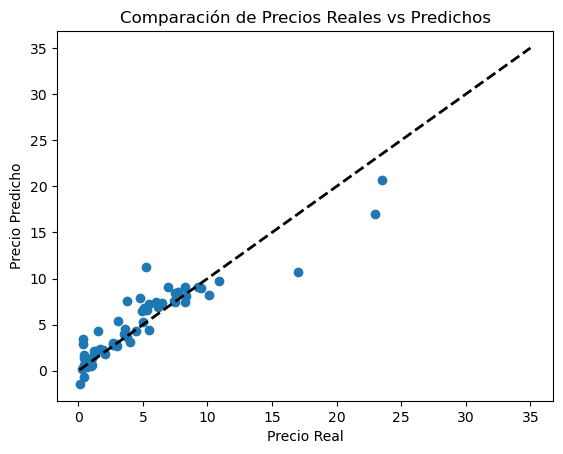

In [12]:
# Gráfico de valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación de Precios Reales vs Predichos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()